In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix
)

# # EDA

In [ ]:
# 1.Load and show data
df = pd.read_csv("\Data\original\Titanic-Dataset.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# 2.Missing Values in each column
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

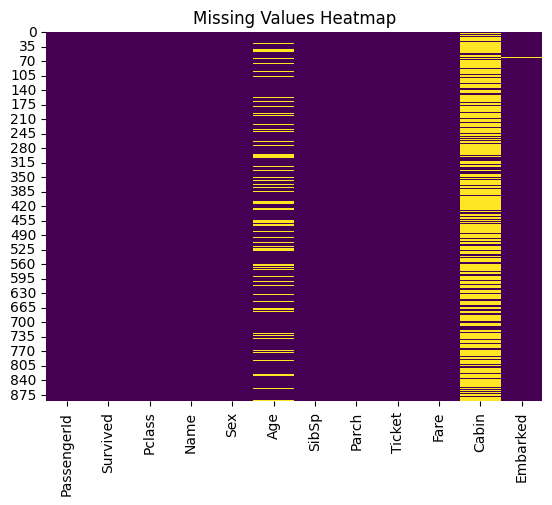

In [7]:
# Visualize missing values 
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

#### 3.cleaning data (By filling or removing data)

In [8]:
# Fill ages with average value
df['Age'] = df['Age'].fillna(df['Age'].median())

In [9]:
# Delete the Cabin column because it has a lot of missing values.
df.drop('Cabin', axis=1, inplace=True)

In [10]:
# Fill missing values ​​in Embarked with most frequent value
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

#### 4.Categorical column coding

In [11]:
# Convert categorical columns to numeric
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

#### 5.Delete useless columns

In [12]:
df.drop(['Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)

In [13]:
# Separate features and target
X = df.drop('Survived', axis=1)
Y = df['Survived']

In [14]:
# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
# Save preprocessed features
X_train.to_csv("\Data\preprocessed\\X.csv", index=False)
X_test.to_csv("\Data\preprocessed\\X_test.csv", index=False)

In [ ]:
# Save target labels
Y_train.to_csv("\Data\preprocessed\\Y.csv", index=False)
Y_test.to_csv("\Data\preprocessed\\Y_test.csv", index=False)

In [17]:
print("Preprocessing complete and files saved.")

Preprocessing complete and files saved.


In [ ]:
# Load preprocessed data
X_train = pd.read_csv("\Data\preprocessed\\X.csv")
X_test = pd.read_csv("\Data\preprocessed\\X_test.csv")
Y_train = pd.read_csv("\Data\preprocessed\\Y.csv")
Y_test = pd.read_csv("\Data\preprocessedY_test.csv")

# logistic regression model

In [17]:
# Train logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, Y_train.values.ravel())

LogisticRegression(max_iter=1000)

In [18]:
# Make predictions
predictions = model.predict(X_test)

In [20]:
# Accuracy
accuracy = accuracy_score(Y_test, predictions)
accuracy

0.8100558659217877

In [21]:
# Classification report
report = classification_report(Y_test, predictions, output_dict=True)
report_df = pd.DataFrame(report).transpose().round(2)

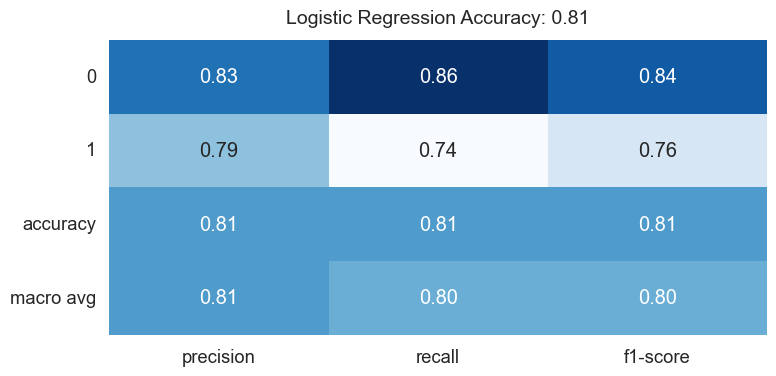

In [22]:
# Plot the classification report as a table
plt.figure(figsize=(8, 4))
sns.set(font_scale=1.2)
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap="Blues", fmt=".2f", cbar=False)
plt.title(f"Logistic Regression Accuracy: {accuracy:.2f}", fontsize=14, pad=12)
plt.tight_layout()

In [23]:
# Save image
plt.savefig("logistic_regression_report.png", dpi=300)
plt.show()

<Figure size 640x480 with 0 Axes>

# Decision Tree model

In [3]:
# Train Decision Tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, Y_train.values.ravel())

DecisionTreeClassifier(random_state=42)

In [4]:
# Predict
predictions = model.predict(X_test)

In [5]:
# Evaluate
accuracy = accuracy_score(Y_test, predictions)
report = classification_report(Y_test, predictions, output_dict=True)
report_df = pd.DataFrame(report).transpose().round(2)

In [ ]:
# Save predictions
pd.DataFrame(predictions, columns=["Predicted"]).to_csv("\Data\Results\predictions_decision_tree.csv", index=False)

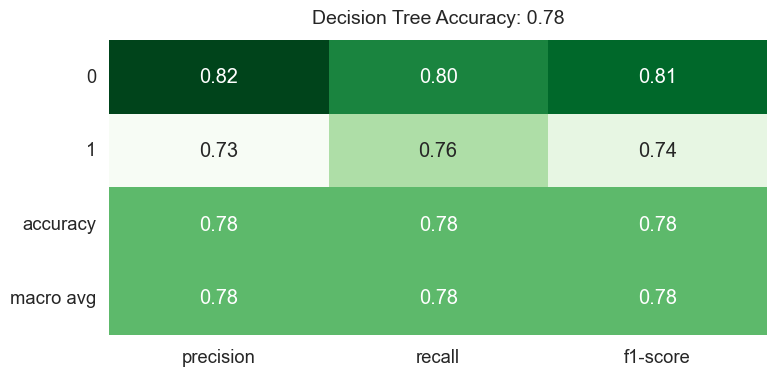

In [8]:
# Visualize classification report
plt.figure(figsize=(8, 4))
sns.set(font_scale=1.2)
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap="Greens", fmt=".2f", cbar=False)
plt.title(f"Decision Tree Accuracy: {accuracy:.2f}", fontsize=14, pad=12)
plt.tight_layout()

In [9]:
# Save the figure
plt.savefig("decision_tree_report.png", dpi=300)
plt.show()

<Figure size 640x480 with 0 Axes>

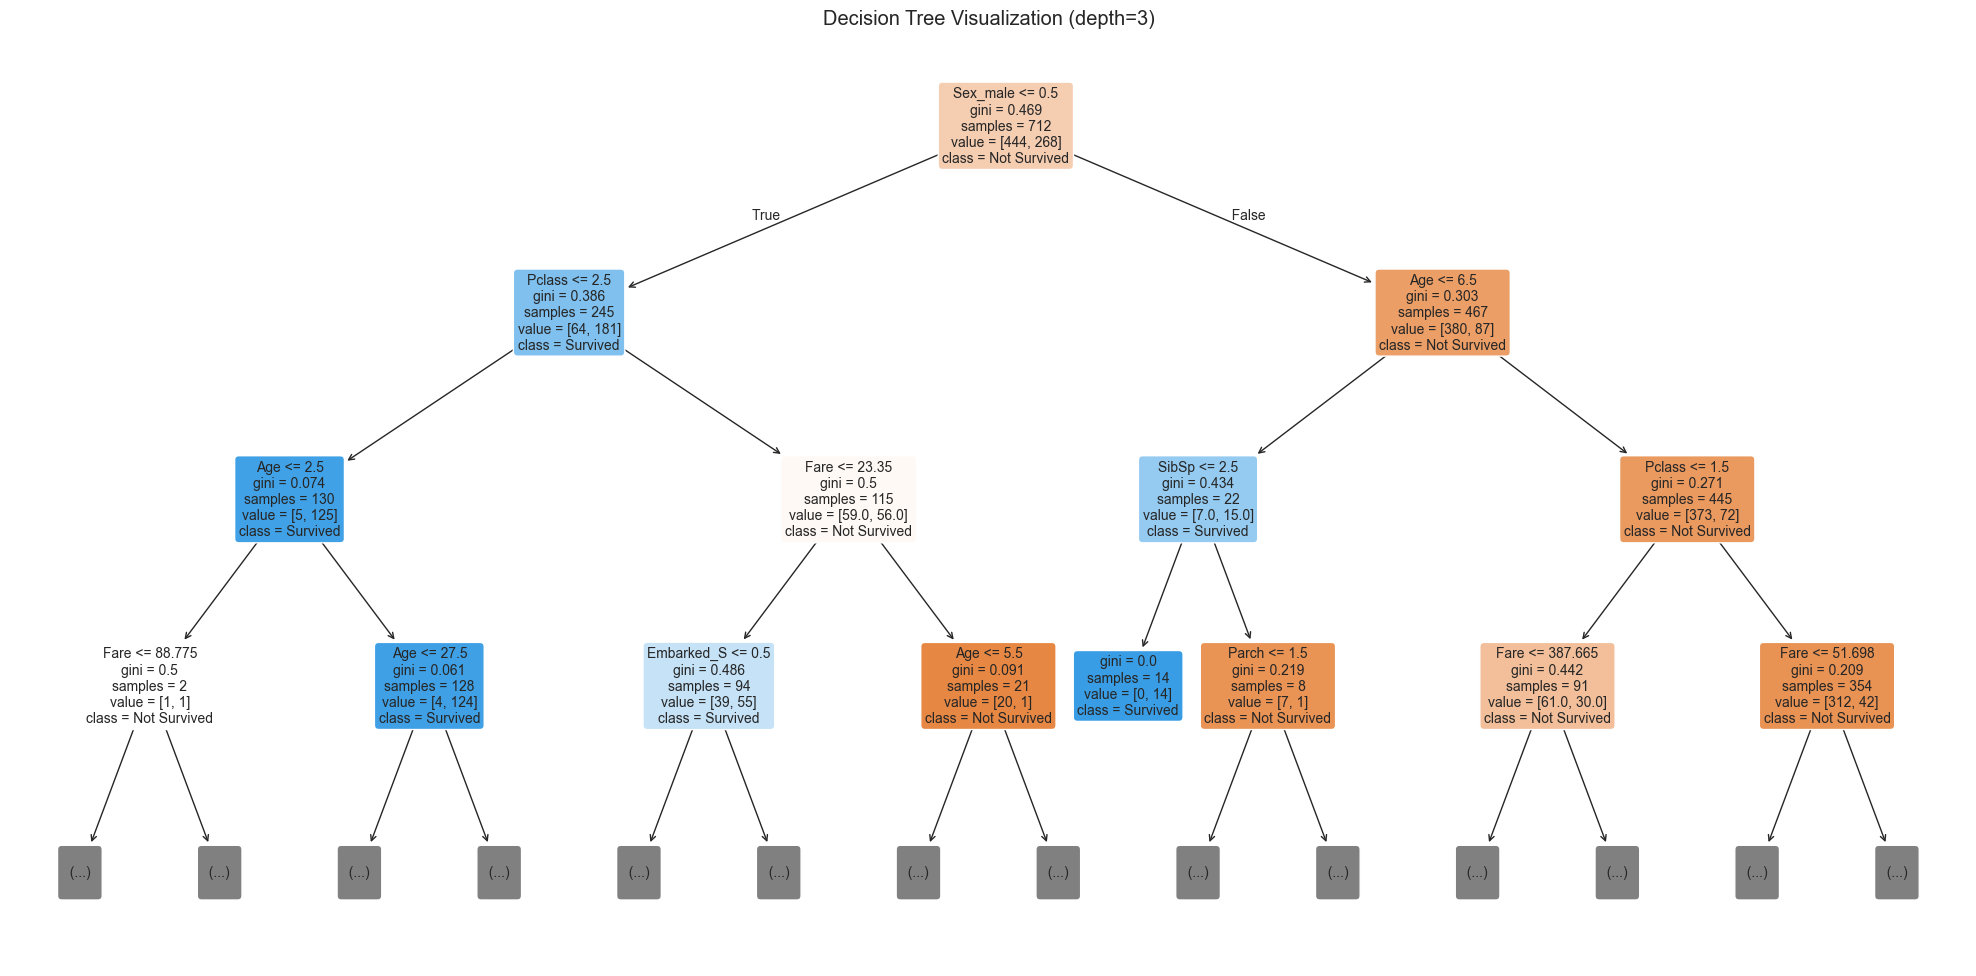

In [10]:
from sklearn.tree import plot_tree

# Plot decision tree
plt.figure(figsize=(20, 10))
plot_tree(model,
          feature_names=X_train.columns,
          class_names=["Not Survived", "Survived"],
          filled=True,
          rounded=True,
          max_depth=3,  # limit depth for readability
          fontsize=10)
plt.title("Decision Tree Visualization (depth=3)")
plt.tight_layout()
plt.savefig("decision_tree_structure.png", dpi=300)
plt.show()


# Train Random Forest model

In [4]:
# Train Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, Y_train.values.ravel())

RandomForestClassifier(random_state=42)

In [5]:
# Predict
predictions = model.predict(X_test)

In [6]:
# Evaluate
accuracy = accuracy_score(Y_test, predictions)
report = classification_report(Y_test, predictions, output_dict=True)
report_df = pd.DataFrame(report).transpose().round(2)

In [ ]:
# Save predictions
pd.DataFrame(predictions, columns=["Predicted"]).to_csv("\Data\Results\\predictions_random_forest.csv", index=False)

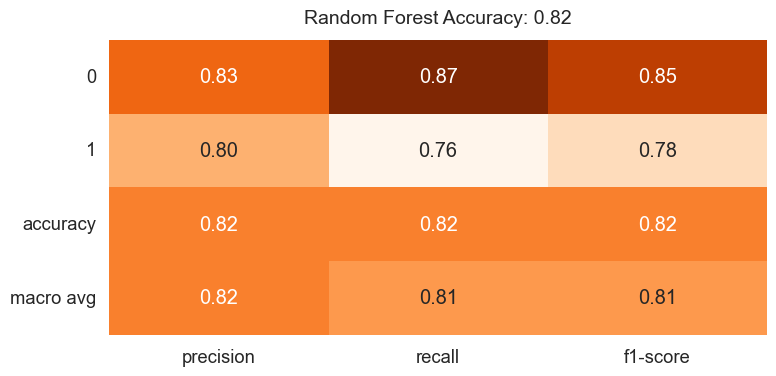

In [8]:
# Visualize classification report
plt.figure(figsize=(8, 4))
sns.set(font_scale=1.2)
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap="Oranges", fmt=".2f", cbar=False)
plt.title(f"Random Forest Accuracy: {accuracy:.2f}", fontsize=14, pad=12)
plt.tight_layout()

In [9]:
# Save the figure
plt.savefig("random_forest_report.png")
plt.show()

<Figure size 640x480 with 0 Axes>

# Naive Bayes model

In [5]:
# Train Naive Bayes model
model = GaussianNB()
model.fit(X_train, Y_train.values.ravel())

GaussianNB()

In [6]:
# Predict
predictions = model.predict(X_test)

In [7]:
# Evaluate
accuracy = accuracy_score(Y_test, predictions)
report = classification_report(Y_test, predictions, output_dict=True)
report_df = pd.DataFrame(report).transpose().round(2)

In [ ]:
# Save predictions
pd.DataFrame(predictions, columns=["Predicted"]).to_csv("\Data\Results\\predictions_naive_bayes.csv", index=False)

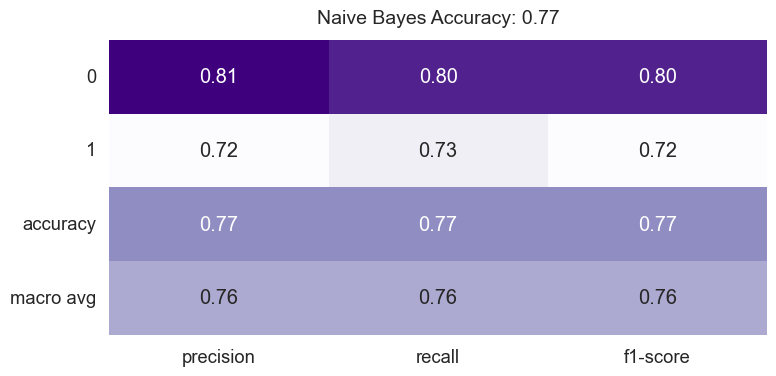

In [10]:
# Visualize classification report
plt.figure(figsize=(8, 4))
sns.set(font_scale=1.2)
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap="Purples", fmt=".2f", cbar=False)
plt.title(f"Naive Bayes Accuracy: {accuracy:.2f}", fontsize=14, pad=12)
plt.tight_layout()

# Support Vector Machine  model

In [3]:
# Standardize the features for SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [4]:
# Train SVM model
model = SVC(kernel='rbf', random_state=42)
model.fit(X_train_scaled, Y_train.values.ravel())

SVC(random_state=42)

In [5]:
# Predict
predictions = model.predict(X_test_scaled)

In [6]:
# Evaluate
accuracy = accuracy_score(Y_test, predictions)
report = classification_report(Y_test, predictions, output_dict=True)
report_df = pd.DataFrame(report).transpose().round(2)

In [ ]:
# Save predictions
pd.DataFrame(predictions, columns=["Predicted"]).to_csv("\Data\Results\\predictions_svm.csv", index=False)

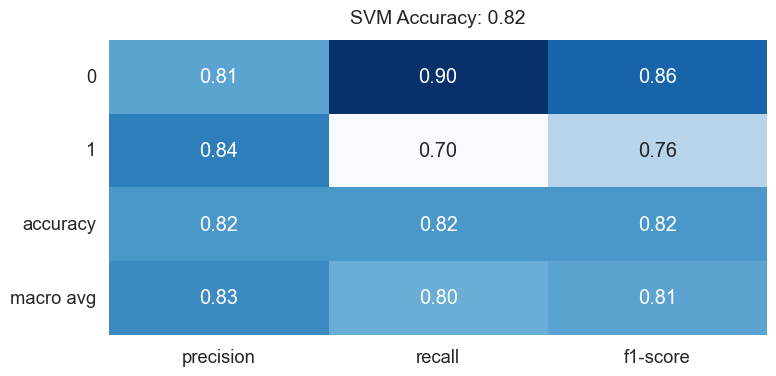

In [8]:
# Visualize classification report
plt.figure(figsize=(8, 4))
sns.set(font_scale=1.2)
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap="Blues", fmt=".2f", cbar=False)
plt.title(f"SVM Accuracy: {accuracy:.2f}", fontsize=14, pad=12)
plt.tight_layout()

# KNN model

In [5]:
# Train KNN model (default k=5)
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train_scaled, Y_train.values.ravel())

KNeighborsClassifier()

In [6]:
# Predict
predictions = model.predict(X_test_scaled)

In [7]:
# Evaluate
accuracy = accuracy_score(Y_test, predictions)
report = classification_report(Y_test, predictions, output_dict=True)
report_df = pd.DataFrame(report).transpose().round(2)

In [ ]:
# Save predictions
pd.DataFrame(predictions, columns=["Predicted"]).to_csv("\Data\Results\\predictions_knn.csv", index=False)

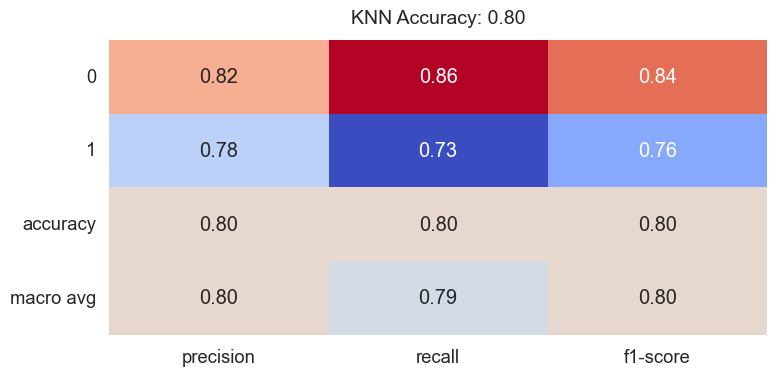

In [9]:
# Visualize classification report
plt.figure(figsize=(8, 4))
sns.set(font_scale=1.2)
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap="coolwarm", fmt=".2f", cbar=False)
plt.title(f"KNN Accuracy: {accuracy:.2f}", fontsize=14, pad=12)
plt.tight_layout()

# Summary of model accuracies

In [2]:
# Create a summary of model accuracies
accuracy_data = {
    'Model': [
        'Logistic Regression',
        'Decision Tree',
        'Random Forest',
        'Naive Bayes',
        'SVM',
        'KNN'
    ],
    'Accuracy': [
        0.81,  # Replace with your actual value
        0.79,
        0.84,
        0.78,
        0.82,
        0.80
    ]
}


In [3]:
accuracy_df = pd.DataFrame(accuracy_data)

In [ ]:
# Save table as image if needed
accuracy_df.to_csv("\Data\Results\\model_accuracy_summary.csv", index=False)

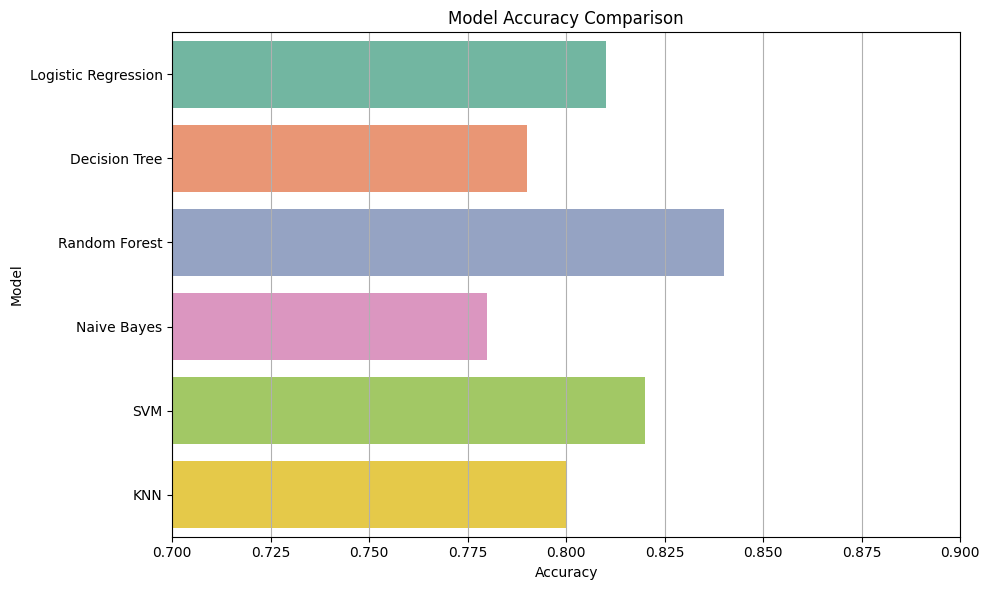

In [8]:
# Plot as bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Accuracy', y='Model', hue='Model', data=accuracy_df, palette='Set2', legend=False)
plt.title('Model Accuracy Comparison')
plt.xlabel('Accuracy')
plt.xlim(0.7, 0.9)  # Optional: zoom into performance range
plt.grid(axis='x')
plt.tight_layout()